### Lushan Map
Code to produce Area around the Lushan Earthquake and corresponding gravity stations

In [58]:
# imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cartopy
import pandas as pd
import cartopy.io.img_tiles as cimgt

In [84]:
df = pd.read_csv('gravitystations.txt', sep='\t')

# Display the DataFrame
df.describe()

,10104600,lat,long,329.8
count,3.760000e+02,376.000000,376.000000,376.000000
mean,5.002982e+07,29.663963,102.271888,2023.272074
std,1.681284e+07,1.852724,1.306952,1156.678518
min,1.010460e+07,26.210000,99.800000,51.900000
25%,5.100778e+07,28.015000,101.432500,1061.225000
50%,5.103065e+07,29.790000,102.220000,1903.500000
75%,5.103772e+07,31.152500,103.010000,3062.600000
max,9.112930e+07,34.090000,105.940000,4465.200000


In [93]:
lat_min = 26.0
lat_max = 32.0
lon_min = 100.0
lon_max = 105.0

df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

df = df[(df['lat'] >= lat_min) & (df['lat'] <= lat_max) &
                 (df['long'] >= lon_min) & (df['long'] <= lon_max)]

df.describe()


,10104600,lat,long,329.8
count,3.400000e+02,340.000000,340.000000,340.000000
mean,5.040103e+07,29.363853,102.075235,2041.762059
std,1.297836e+07,1.630131,1.125935,1151.229649
min,1.010590e+07,26.210000,100.020000,51.900000
25%,5.100848e+07,27.890000,101.317500,1116.500000
50%,5.103105e+07,29.465000,102.180000,1903.500000
75%,5.103732e+07,30.795000,102.785000,3065.725000
max,9.112930e+07,31.980000,104.780000,4465.200000


In [103]:
stations_df = pd.read_csv('absgravitystations.txt', sep=' ')

stations_df.head()

,name,lat,long,num
0,xichang,27.91,102.23,1579.6
1,panzhihua,26.50,101.74,1174.6
2,pixian,30.91,103.76,616.7


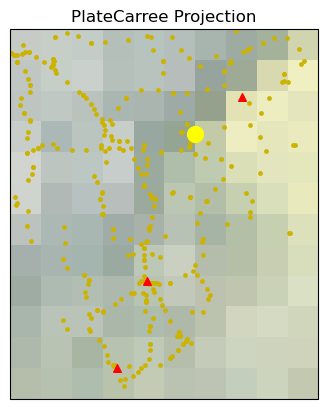

In [125]:
proj = ccrs.PlateCarree()

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.set_title('PlateCarree Projection')

extent = [100, 105, 26, 32]
ax.set_extent(extent)

ax.scatter(df['long'], df['lat'], color=(.8, .7, 0), marker='o', s=6, transform=ccrs.PlateCarree())
ax.scatter(stations_df['long'], stations_df['lat'], color='red', marker='^', s=30, transform=ccrs.PlateCarree())
ax.scatter(103.0, 30.3, color='yellow', marker='o', s=130)

plt.show()